<a href="https://colab.research.google.com/github/simsekergun/ENEE691/blob/main/PANDAS/Data_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### About the dataset
- year, month, day Date of departure.
- dep_time, arr_time Actual departure and arrival times (format HHMM or HMM), local tz.
- sched_dep_time, sched_arr_time Scheduled departure and arrival times (format HHMM or HMM),
- local tz.
- dep_delay, arr_delay Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
- carrier Two letter carrier abbreviation. 
- flight Flight number.
- tailnum Plane tail number. 
- origin, dest Origin and destination.
- air_time Amount of time spent in the air, in minutes.
- distance Distance between airports, in miles.
- hour, minute Time of scheduled departure broken into hour and minutes.
- time_hour Scheduled date and hour of the flight as a POSIXct date.

In [ ]:
flights = pd.read_csv('https://raw.githubusercontent.com/mguner/teaching/main/datasets/nyc_flights/nyc_flights.csv')

In [ ]:
flights.head()

In [ ]:
flights.info()

In [ ]:
flights[flights.carrier == 'UA']

In [ ]:
flights[flights.carrier == 'UA'].drop(['carrier','hour','minute'], axis=1)

In [ ]:
trues_falses = (flights.carrier == 'UA').values

In [ ]:
flights[trues_falses]

[Comparison Operators as ufuncs - DataScienceHandbook](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html#Comparison-Operators-as-ufuncs)

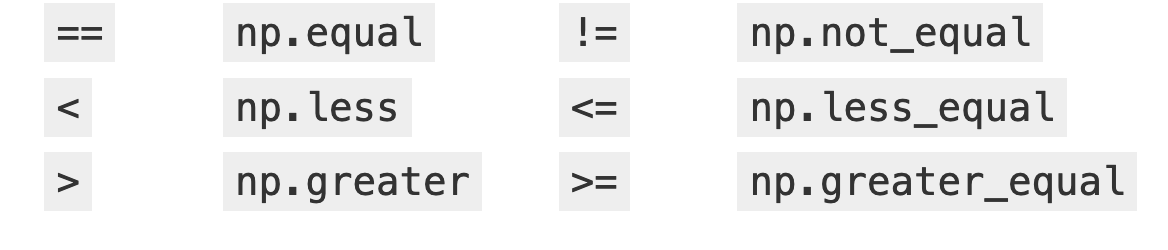

[Boolean Operators](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html#Boolean-operators)

operator|function
-----| -----
`&` | 'and' operator
`\|` | 'or' operator
`\~` | 'not' operator
`\^` | 'xor' operator


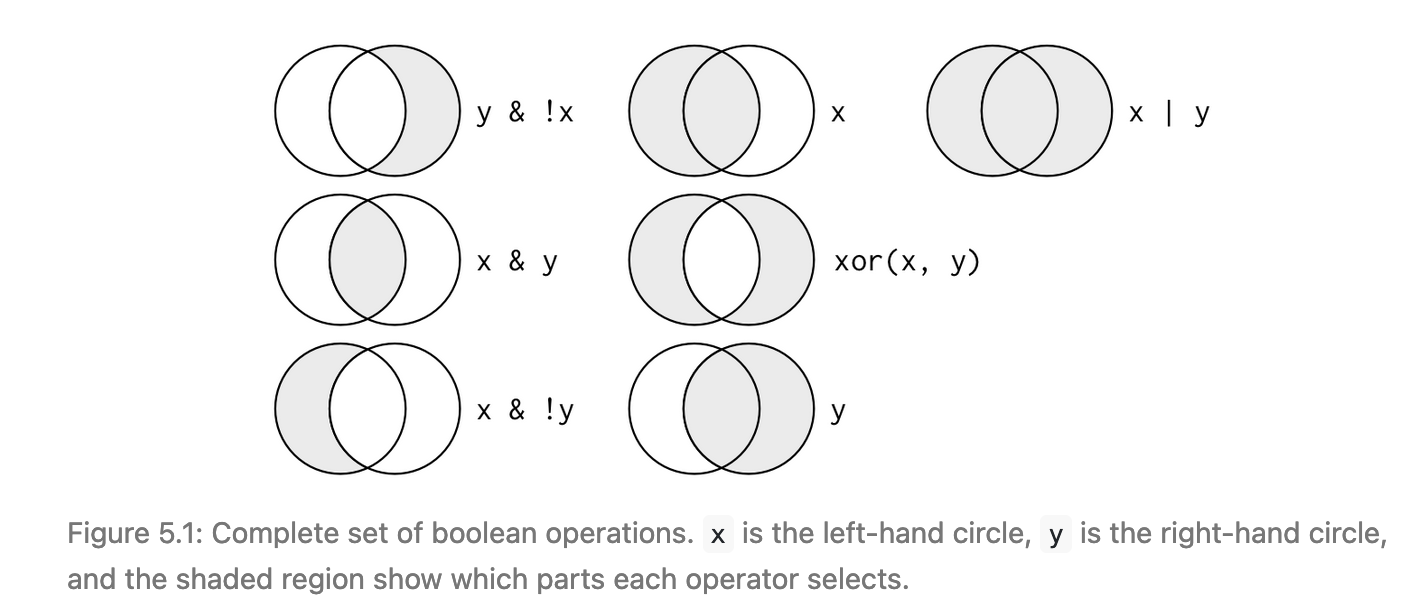

In [ ]:
flights[(flights.carrier == 'UA') & (flights.dep_delay > 3)]

## Missing Values

[Missing Values in Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html)

In [ ]:
flights.notnull()

[Operating on null values](https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html#Operating-on-Null-Values)

## index of a dataframe

[Pandas - Documentation - Indexing and selecting Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

__Why indexing data?__


__.loc__ vs __.iloc__


In [ ]:
flights.loc[:, ['dep_time','sched_dep_time','dep_delay']]

In [ ]:
flights.iloc[:, 3:6]

## Sorting Values

In [ ]:
flights.dep_delay.sort_values(ascending = False)

In [ ]:
flights.dep_delay.sort_values(ascending = True)

In [ ]:
flights.carrier.sort_values()

## Counting Values

In [ ]:
flights.carrier.value_counts()

In [ ]:
flights.dep_delay.value_counts(dropna = True)

In [ ]:
flights.carrier.nunique()

In [ ]:
flights.carrier.unique()

## Summary Information

In [ ]:
flights[['dep_delay', 'arr_time', 'arr_delay']].describe()

In [ ]:
%matplotlib inline
arr_delay = flights.arr_delay.dropna().values
plt.figure(figsize = (15, 5))
plt.boxplot(arr_delay, vert = False)
plt.show()

In [ ]:
plt.figure(figsize = (15, 5))
plt.hist(arr_delay,bins=[0, 5, 10, 20, 30, 50, 75, 100, 120, 150, 200])
plt.show()

In [ ]:
x = np.arange(len(arr_delay)) / len(arr_delay)*100
plt.figure(figsize = (15, 5))
plt.plot(x,np.sort(arr_delay))
plt.show()

In [ ]:
len(arr_delay)*100

In [ ]:
flights.arr_delay.quantile(0.95)

In [ ]:
flights.arr_delay.quantile(0.80)

In [ ]:
flights.arr_delay.max()

In [ ]:
flights.arr_delay.min()

In [ ]:
## std
flights.arr_delay.std()

In [ ]:
flights.arr_delay.var()

## Group_By method: Basics

In [ ]:
daily_total_dep_delays = flights.groupby(['day']).dep_delay.sum()
daily_total_dep_delays[:10]

__Under the hood__

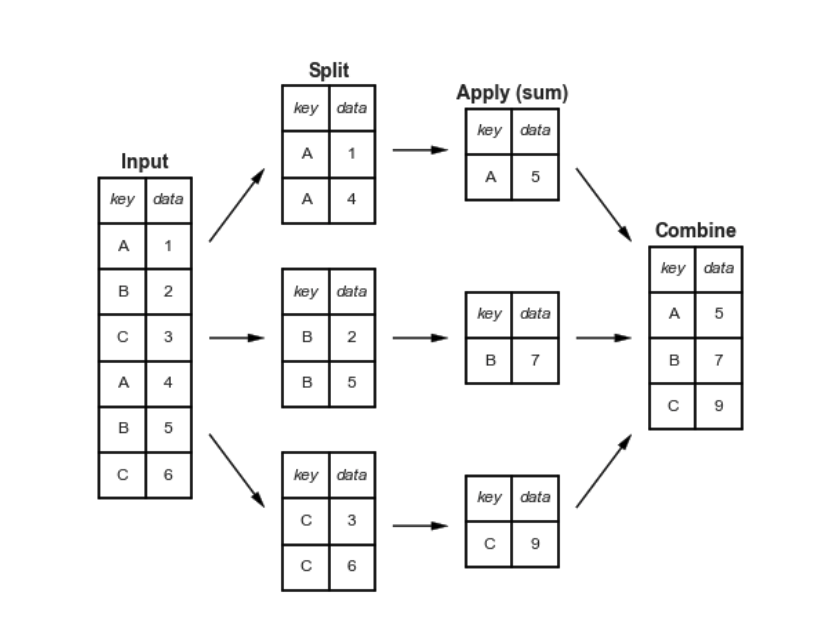

[Figure Source](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html#Split,-apply,-combine)

In [ ]:
delays_destination = flights.groupby('dest').dep_delay.mean()
delays_destination

In [ ]:
# let us use the 'seaborn-talk' style. Change it if you wish
plt.style.use('seaborn-talk')

# figure size
plt.figure(figsize = (20, 7))

# Histogram
plt.bar(delays_destination.index, delays_destination.values)

# x-label
plt.xlabel('Days of the month')

# y-label
plt.ylabel('Average Delays')

# x_ticks

plt.xticks(rotation = 90)
# Show
plt.show()

In [ ]:
delays_destination[delays_destination >25]

Do you see any pattern?

__BHM__: [Birmingham-AL](https://goo.gl/maps/9UHiEJxrjQCZkbim7)

__CAE__: [Columbia-SC](https://goo.gl/maps/HzF1ZSQyWz4LoxTi6)

__DSM__: [Des Moines - IO](https://goo.gl/maps/3EgkwDpfYKo6Yngv5)

__JAC__: [Jackson - WY](https://goo.gl/maps/CESs8scrCM5GWAda8)

__OKC__: [Oklahoma City - OK](https://goo.gl/maps/DfUEo7r9tV3FEzKq7)

__TUL__: [Tulsa - OK](https://goo.gl/maps/xuArw3CEjHh4zh5R6)

__TYS__: [Knoxville - TN](https://goo.gl/maps/5cyYPi2xZhdiADkDA)


## Aggregation

In [ ]:
agg_dictionary = {'dest': 'count', 'dep_delay': 'mean'}
flights.groupby('dest').aggregate(agg_dictionary)

__Let's check our hypothesis:__

In [ ]:
aggregated_df = flights.groupby('dest').aggregate(agg_dictionary)
print(aggregated_df[aggregated_df.dep_delay >25])
aggregated_df[aggregated_df.dest <631].shape

### Aggregation and naming columns of the resulting table

In [ ]:
# this will give error
aggregated_df.sort_values(by = 'dest')

Sometimes we might want to give names to columns after the aggregation. Here is how you can achive this.

In [ ]:
grouped_by_dest = flights.groupby('dest').agg(
    flight_counts = ('dest', 'count') , 
    delay_mean= ('dep_delay', 'mean') ,
    distance_mean = ('distance', 'mean')
    )
grouped_by_dest

### User defined functions

In [ ]:
def my_avg_funct(x):
  return x.mean()

In [ ]:
grouped_by_dest = flights.groupby('dest').agg(
    flight_counts = ('dest', 'count') , 
    delay_mean= ('dep_delay', 'mean') ,
    distance_mean = ('arr_delay', my_avg_funct)
    )
grouped_by_dest


## Grouping by multiple variables

In [ ]:

multiple_grouped = flights.groupby(['origin', 'dest']).dep_delay.mean()

multiple_grouped

Now we can access a group by usign its multiple index:

In [ ]:
multiple_grouped[('JFK', 'BOS')]

In [ ]:
multiple_grouped

## Filtering

In [ ]:
def my_delay_funct(group):
  return group.dep_delay.mean() > 25

In [ ]:
filtered_by_delay = flights.groupby(['dest']).filter(my_delay_funct)
filtered_by_delay

In [ ]:
flights[flights.dep_delay > 25]

In [ ]:
filtered_by_delay[filtered_by_delay.dep_delay <25]

In [ ]:
grouped = flights.groupby('dest')
print(grouped.get_group('CAE'))

In [ ]:
print(type(grouped.get_group('CAE')))

In [ ]:
grouped.get_group('CAE').dep_delay.mean() > 25


In [ ]:
flights[flights.dest.isin(['JAC', 'TUL', 'DSM', 'OKC', 'TYS', 'BHM', 'CAE' ])]

## Transform Method

In [ ]:
flights['speed_per_min'] = flights.distance/flights.arr_time

In [ ]:
flights.head()

In [ ]:
def speed_func(group ):
  return group - group.mean()

In [ ]:
flights['speed_dif_from_group'] = flights.groupby('dest')['speed_per_min'].transform(speed_func)
flights.head()

__Transforming Missing Values with Group Mean__

In [ ]:
def my_filling_func(group):
  m = group.mean()
  if np.isnan(m):
    return -9999
  else:
    return   group.fillna(m)

In [ ]:
flights['air_time2'] = flights.groupby('dest')['air_time'].transform(my_filling_func)

In [ ]:
def relative_contribution_to_total_delay(group):
  return group/group.sum()

In [ ]:
flights['dep_delay_relative_transform'] = flights.groupby(['origin', 'dest', 'month', 'day'])['dep_delay'].transform(relative_contribution_to_total_delay) 

# Try it by yourself!

Using the flights dataframe answer the following questions

1. Had an arrival delay of two or more hours.

2. Flew to Houston (IAH or HOU)

3. Were operated by American, Delta

4. How many values are missing in `dep_time`?

5. Sort `flight` to find fastest flight.

6. Which flights travelled the shortest?

7. When do the first and last flights leave each day?

8. When there is a missing value in `dep_time` then this is an indication of canceled flight. Find the number of cancelled flights for each (`carrier`, `origin`) combination.

9. Which carrier has the worst `dep_delay`s? 

10. Which plane (`tailnum`) has the worst on-time record?

11. For each plane, count the number of flights before the first delay of greater than 1 hour.